# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

# 
Recall the minimal variance portfolio and the mean-variance portfolio we constructed in the previous mini-project.

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as LA
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats

In [2]:
# building the high risk portfolio
tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'NVDA']
tech = yf.download(tickers, start = '2013-01-01', end = '2025-01-01')['Close']

C:\Users\luvy\AppData\Local\Temp\ipykernel_3752\571376389.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tech = yf.download(tickers, start = '2013-01-01', end = '2025-01-01')['Close']
[*********************100%***********************]  5 of 5 completed


In [3]:
tech_log_returns = np.log(1 + tech.pct_change().dropna())
N_days, N_stocks = tech_log_returns.shape

trading_days = 250
tech_annual_mean_returns = tech_log_returns.mean() * trading_days
tech_annual_cov_matrix = tech_log_returns.cov() * trading_days

## minimal variance portfolio
Recall that the minimal variance porfolio is found by minimizing ${\bf w}^{\top} {\bf \Sigma} {\bf w}$ over all ${\bf w}$ subject to ${\bf w}{\bf 1} = {\bf 1}$. Using Lagrange multipliers, we can show that the solution is
$$
{\bf w} = \frac{\bf{\Sigma^{-1} 1}}{\bf{1^{\top}\Sigma^{-1} 1}}
$$

In [4]:
# some useful vectors to be used again later
ones = np.ones(N_stocks)
invC_1 = LA.solve(tech_annual_cov_matrix, ones)

# weights of minimal variance portfolio
min_var_weights = invC_1 / sum(invC_1)

# returns of minimal variance portfolio
min_var_returns = tech_log_returns @ min_var_weights

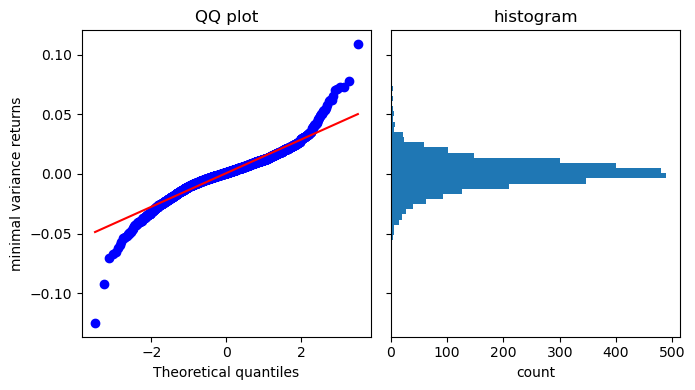

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 4), sharey = True)

stats.probplot(min_var_returns, dist="norm", plot=ax[0])
ax[0].set_title('QQ plot')
ax[0].set_ylabel('minimal variance returns')
ax[1].hist(min_var_returns, bins = int(np.sqrt(3000)), orientation = 'horizontal')
ax[1].set_title('histogram')
ax[1].set_xlabel('count')
fig.tight_layout()
fig.savefig('fig2.jpeg', transparent = False, bbox_inches = 'tight');

In [6]:
stats.normaltest(min_var_returns)

NormaltestResult(statistic=412.7271049809433, pvalue=2.384777620213488e-90)

## observations
The QQ-plot and the histogram both indicate that returns from the minimal variance portfolio have tails too thick to be normal. The hypothesis test confirms this.

# mean variance portfolio
We maxmize ${\bf \mu w} - \frac{\gamma}{2} {\bf w^{\top}\Sigma w}$ over all ${\bf w}$ subject to ${\bf w^{\top}1}$. The solution is given by
$$
{\bf w} = \frac{1}{\gamma}{\bf \Sigma}^{-1}({\bf \mu} - \lambda {\bf 1})
$$
where
$$
\lambda = \frac{{\bf 1^{\top}\Sigma^{-1}\mu} - \gamma}{{\bf 1^{\top}\Sigma^{-1}1}}
$$
For simplicity, we take $\gamma = 2$.

In [7]:
gam = 2
invC_mu = LA.solve(tech_annual_cov_matrix, tech_annual_mean_returns)
lam = (ones @ invC_mu - gam) / (ones @ invC_1)
mean_var_weights = (invC_mu - lam * invC_1) / gam

# weights
mean_var_returns = tech_log_returns @ mean_var_weights

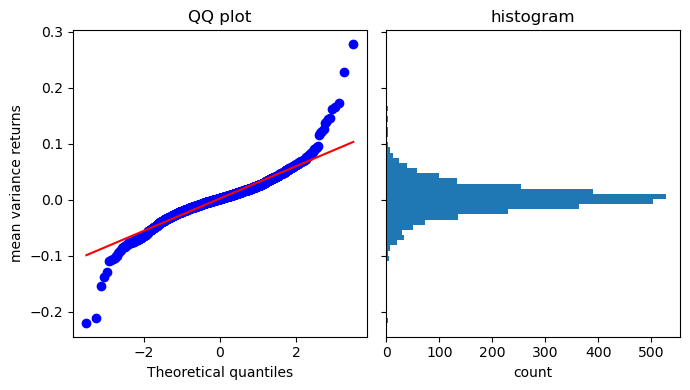

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 4), sharey = True)

stats.probplot(mean_var_returns, dist="norm", plot=ax[0])
ax[0].set_title('QQ plot')
ax[0].set_ylabel('mean variance returns')
ax[1].hist(mean_var_returns, bins = int(np.sqrt(3000)), orientation = 'horizontal')
ax[1].set_title('histogram')
ax[1].set_xlabel('count')
fig.tight_layout();

In [9]:
stats.normaltest(mean_var_returns)

NormaltestResult(statistic=492.1025218614104, pvalue=1.3845068616388593e-107)

## observations
The QQ-plot and histogram and normality test for the mean variance portfolio also all indicate non-normality, but notice that the spread is larger. Whereas most of the returns for the minimal variance portfolio are between -0.05 and 0.05, the returns for the mean-variance portfolio are between -0.1 and 0.1. Also note that the highest return here is $\approx 0.3$, whereas the highest return for the other portfolio is only $\approx 0.1$.